In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from datetime import datetime, date
from collections import defaultdict

### Train Users that are only in Session

In [2]:
train_users_path = '../../Data/final_train_users.csv'
train_users = pd.read_csv(train_users_path)
train_users.head()

,Unnamed: 0,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,0,137021,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
1,1,137022,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
2,2,137023,4grx6yxeby,2014-01-01,20140101001639,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
3,3,137024,ncf87guaf0,2014-01-01,20140101002146,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
4,4,137025,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB


In [3]:
sessions_path = '../../Data/sessions.csv'
sessions = pd.read_csv(sessions_path)
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


### Train Users that are not NDF

In [4]:
booked_train_users = train_users[train_users['country_destination'] != 'NDF']

In [5]:
booked_train_users.head()

,Unnamed: 0,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,0,137021,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
4,4,137025,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB
6,6,137027,xwxei6hdk4,2014-01-01,20140101002742,2014-01-07,FEMALE,32.0,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US
8,8,137029,ro2stddszp,2014-01-01,20140101005503,2014-12-04,-unknown-,19.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other
10,10,137032,awiurksqr3,2014-01-01,20140101010113,2014-01-02,FEMALE,32.0,facebook,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,US


### Function to one hot encode categorical Features

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

def makeFeature(column):
    temp = (booked_train_users[column]).as_matrix()

    D = defaultdict(int)
    count = 1
    for i in np.unique(temp):
        D[i] = count
        count += 1

    newX = np.zeros((temp.shape))
    for i in range(temp.shape[0]):
        lang = temp[i]
        newX[i] = D[lang]
    newX = newX[:,np.newaxis]
    
    newX = enc.fit_transform(newX)
    newX = newX.toarray()
    
    return newX

In [8]:
columns = ['signup_method', 'signup_flow', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

### All features from the user csv that are now one hot encoded

In [9]:
X1 = makeFeature('gender')
for c in columns:
    tempX = makeFeature(c)
    X1 = np.concatenate((X1,tempX),axis=1)

/home/behnam/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


### All the Actions!

In [10]:
def action_bool(action):
    user_action = sessions[sessions['action'] == action]
    performed = booked_train_users['id'].isin(user_action['user_id'])
    colname = 'b_' + action
    booked_train_users[colname] = performed

In [11]:
actions = sessions['action'].dropna().drop_duplicates()


In [12]:
for action in actions:
    action_bool(action)
    
booked_train_users.head()

/home/behnam/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,...,b_south-america,b_braintree_client_token,b_view,b_stpcv,b_set_minimum_payout_amount,b_support_phone_numbers,b_refund_guest_cancellation,b_accept_decline,b_deactivated,b_rest-of-world
0,0,137021,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,...,False,False,False,False,False,False,False,False,False,False
4,4,137025,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,-unknown-,NaN,basic,25,...,False,False,False,False,False,False,False,False,False,False
6,6,137027,xwxei6hdk4,2014-01-01,20140101002742,2014-01-07,FEMALE,32.0,facebook,0,...,False,False,False,False,False,False,False,False,False,False
8,8,137029,ro2stddszp,2014-01-01,20140101005503,2014-12-04,-unknown-,19.0,basic,0,...,False,False,False,False,False,False,False,False,False,False
10,10,137032,awiurksqr3,2014-01-01,20140101010113,2014-01-02,FEMALE,32.0,facebook,0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
col_name = ['b_' + action for action in actions]

In [14]:
actX = booked_train_users[col_name].as_matrix().astype(int)


### Either the person speaks english or naught

In [15]:
X = (booked_train_users['language'] == 'en').as_matrix().astype(int)
X = X[:,np.newaxis]
labels = (booked_train_users['country_destination'] == 'US').as_matrix().astype(int)

### Gotta get that Date

In [16]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [(0, (date(Y,  1,  1),  date(Y,  3, 20))),  #'winter'
           (1, (date(Y,  3, 21),  date(Y,  6, 20))),  #'spring'
           (2, (date(Y,  6, 21),  date(Y,  9, 22))),  #'summer'
           (3, (date(Y,  9, 23),  date(Y, 12, 20))),  #'autumn'
           (0, (date(Y, 12, 21),  date(Y, 12, 31)))]  #'winter'
def get_season(now):
    date_format = "%Y-%m-%d"
    d1 = now
    now = datetime.strptime(d1, date_format)
    
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)


In [17]:
enc = OneHotEncoder()
a = np.array(booked_train_users['date_account_created'].apply(get_season))
a = a[:,np.newaxis]
dateFeat = enc.fit_transform(a)
dateFeat = dateFeat.toarray()

In [18]:
bookX = np.concatenate((actX,X,dateFeat,X1),axis=1)

In [19]:
bookX.shape

(28774, 450)

In [20]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_curve, auc, roc_auc_score
from scipy.stats import randint as sp_randint

In [21]:
kf = KFold(n_splits=5,shuffle=True, random_state=42)


In [22]:
#Random Forest
param_dist = {"max_depth": [3, None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
             "n_estimators": [10,50,100] }
clf = RandomForestClassifier()

In [23]:
# run randomized search
n_iter_search = 11
ftwo_scorer = make_scorer(f1_score)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring = ftwo_scorer)


In [24]:
def findthreshold(fpr,tpr,thresholds):
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
    return roc.ix[(roc.tf-0).abs().argsort()[:1]].reset_index()['thresholds'][0]

In [25]:
score = []
fpr = []
tpr = []
roc_auc = []
thresh = [] 
for train_index, val_index in kf.split(bookX):
    X_train, X_val = bookX[train_index], bookX[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    
    random_search.fit(X_train, y_train)
    rs = random_search.best_params_
    
    print rs
    clf = RandomForestClassifier(n_estimators=rs['n_estimators'],bootstrap=rs['bootstrap'],criterion=rs['criterion'],max_depth=rs['max_depth'])
    clf.fit(X_train,y_train)
    
    #ROC 
    prob = clf.predict_proba(X_val)[:,1]

    f, t, thresholds = roc_curve(y_val, prob)
    thresh.append(findthreshold(f,t,thresholds))
    
    fpr.append(f)
    tpr.append(t)
    area = auc(f,t)
    print area
    roc_auc.append(area)
    
    #predictions = clf.predict(X_val)
    #f = accuracy_score(predictions,y_val)
    #score.append(f)

{'n_estimators': 100, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}
0.610365117573
{'n_estimators': 10, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}
0.573593308207
{'n_estimators': 10, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3}
0.581815859845
{'n_estimators': 10, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}
0.588887176523
{'n_estimators': 100, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3}
0.583535842842


In [27]:
np.mean(thresh)

0.68984652173952077

In [43]:
np.mean(roc_auc)

0.5892708183707025

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

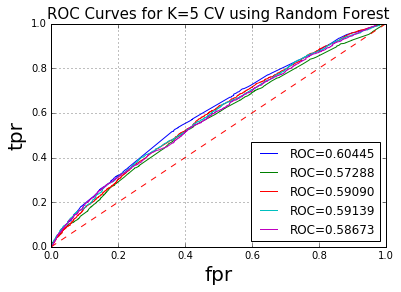

In [45]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.hold
plt.grid()
for i in range(len(fpr)):
    plt.plot(fpr[i],tpr[i],label='ROC={0:.5f}'.format(roc_auc[i]))

plt.plot([0,1],[0,1],linestyle='--',color='r')
    
plt.ylabel('tpr',fontsize=20)
plt.xlabel('fpr',fontsize=20)
plt.title('ROC Curves for K=5 CV using Random Forest',fontsize=15)
plt.legend(loc=4)
plt.show()